In [1]:
import metpy.calc as mpcalc

In [2]:
import metpy.constants as mpconst

In [3]:
from siphon.catalog import TDSCatalog

In [40]:
url='https://thredds.ucar.edu/thredds/catalog/nexrad/level3/N0B/LTX/20220504/catalog.html'

In [41]:
print(url)

https://thredds.ucar.edu/thredds/catalog/nexrad/level3/N0B/LTX/20220504/catalog.html


In [42]:
url_xml = url.replace(".html", ".xml")

In [43]:
cat = TDSCatalog(url_xml)

In [44]:
print(cat.datasets)

['Level3_LTX_N0B_20220504_1715.nids', 'Level3_LTX_N0B_20220504_1711.nids', 'Level3_LTX_N0B_20220504_1706.nids', 'Level3_LTX_N0B_20220504_1702.nids', 'Level3_LTX_N0B_20220504_1657.nids', 'Level3_LTX_N0B_20220504_1653.nids', 'Level3_LTX_N0B_20220504_1649.nids', 'Level3_LTX_N0B_20220504_1644.nids', 'Level3_LTX_N0B_20220504_1639.nids', 'Level3_LTX_N0B_20220504_1635.nids', 'Level3_LTX_N0B_20220504_1630.nids', 'Level3_LTX_N0B_20220504_1625.nids', 'Level3_LTX_N0B_20220504_1621.nids', 'Level3_LTX_N0B_20220504_1616.nids', 'Level3_LTX_N0B_20220504_1612.nids', 'Level3_LTX_N0B_20220504_1607.nids', 'Level3_LTX_N0B_20220504_1602.nids', 'Level3_LTX_N0B_20220504_1558.nids', 'Level3_LTX_N0B_20220504_1553.nids', 'Level3_LTX_N0B_20220504_1548.nids', 'Level3_LTX_N0B_20220504_1544.nids', 'Level3_LTX_N0B_20220504_1539.nids', 'Level3_LTX_N0B_20220504_1535.nids', 'Level3_LTX_N0B_20220504_1530.nids', 'Level3_LTX_N0B_20220504_1525.nids', 'Level3_LTX_N0B_20220504_1521.nids', 'Level3_LTX_N0B_20220504_1516.nids', 

In [45]:
print('Total files: ' + str(len(cat.datasets)))

Total files: 295


In [46]:
ds = cat.datasets[0]
ds.access_urls

{'OPENDAP': 'https://thredds.ucar.edu/thredds/dodsC/nexrad/level3/N0B/LTX/20220504/Level3_LTX_N0B_20220504_1715.nids',
 'HTTPServer': 'https://thredds.ucar.edu/thredds/fileServer/nexrad/level3/N0B/LTX/20220504/Level3_LTX_N0B_20220504_1715.nids',
 'CdmRemote': 'https://thredds.ucar.edu/thredds/cdmremote/nexrad/level3/N0B/LTX/20220504/Level3_LTX_N0B_20220504_1715.nids',
 'NCML': 'https://thredds.ucar.edu/thredds/ncml/nexrad/level3/N0B/LTX/20220504/Level3_LTX_N0B_20220504_1715.nids',
 'UDDC': 'https://thredds.ucar.edu/thredds/uddc/nexrad/level3/N0B/LTX/20220504/Level3_LTX_N0B_20220504_1715.nids',
 'ISO': 'https://thredds.ucar.edu/thredds/iso/nexrad/level3/N0B/LTX/20220504/Level3_LTX_N0B_20220504_1715.nids'}

In [47]:
from datetime import datetime


In [48]:
import xarray as xr

In [49]:
from metpy.units import units

In [50]:
 
from siphon.radarserver import RadarServer

In [51]:
cat = TDSCatalog('https://thredds.ucar.edu/thredds/radarServer/catalog.xml')

In [52]:
list(cat.catalog_refs)

['NEXRAD Level II Radar for Case Study CCS039',
 'NEXRAD Level II Radar from IDD',
 'NEXRAD Level III Radar for Case Study CCS039',
 'NEXRAD Level III Radar from IDD',
 'TDWR Level III Radar from IDD']

In [53]:
cat.catalog_refs['NEXRAD Level III Radar from IDD'].href

'https://thredds.ucar.edu/thredds/radarServer/nexrad/level3/IDD/dataset.xml'

In [54]:
rs= RadarServer(cat.catalog_refs['NEXRAD Level III Radar from IDD'].href)

In [55]:
from datetime import datetime,timedelta

In [56]:
query = rs.query()
now=datetime.utcnow()
query.stations('LTX').time_range(now - timedelta(hours=1), now).variables('N0B')

var=N0B&time_start=2022-05-04T16%3A18%3A58.510045&time_end=2022-05-04T17%3A18%3A58.510045&stn=LTX

In [57]:
query_cat = rs.get_catalog(query)

In [58]:
sorted(query_cat.datasets)

['Level3_LTX_N0B_20220504_1621.nids',
 'Level3_LTX_N0B_20220504_1625.nids',
 'Level3_LTX_N0B_20220504_1630.nids',
 'Level3_LTX_N0B_20220504_1635.nids',
 'Level3_LTX_N0B_20220504_1639.nids',
 'Level3_LTX_N0B_20220504_1644.nids',
 'Level3_LTX_N0B_20220504_1649.nids',
 'Level3_LTX_N0B_20220504_1653.nids',
 'Level3_LTX_N0B_20220504_1657.nids',
 'Level3_LTX_N0B_20220504_1702.nids',
 'Level3_LTX_N0B_20220504_1706.nids',
 'Level3_LTX_N0B_20220504_1711.nids',
 'Level3_LTX_N0B_20220504_1715.nids']

In [59]:
#query.stations('TLX','LTX').time_range(now - timedelta(hours=1), now).variables('N0B', 'N0C')
query.stations('LTX').time_range(now - timedelta(hours=1), now).variables('N0B')

var=N0B&time_start=2022-05-04T16%3A18%3A58.510045&time_end=2022-05-04T17%3A18%3A58.510045&stn=LTX

In [60]:
query_cat = rs.get_catalog(query)

sorted(query_cat.datasets)

['Level3_LTX_N0B_20220504_1621.nids',
 'Level3_LTX_N0B_20220504_1625.nids',
 'Level3_LTX_N0B_20220504_1630.nids',
 'Level3_LTX_N0B_20220504_1635.nids',
 'Level3_LTX_N0B_20220504_1639.nids',
 'Level3_LTX_N0B_20220504_1644.nids',
 'Level3_LTX_N0B_20220504_1649.nids',
 'Level3_LTX_N0B_20220504_1653.nids',
 'Level3_LTX_N0B_20220504_1657.nids',
 'Level3_LTX_N0B_20220504_1702.nids',
 'Level3_LTX_N0B_20220504_1706.nids',
 'Level3_LTX_N0B_20220504_1711.nids',
 'Level3_LTX_N0B_20220504_1715.nids']

In [26]:
#product_codes = ['NCR', 'N0B','N0C']
product_codes = ['N0B']
query_catalogs=dict()
for product_code in product_codes:
    query.stations('LTX').time_range(now - timedelta(hours=1), now).variables(product_code)
    query_cat = rs.get_catalog(query)
    query_catalogs[product_code]=query_cat
    


In [27]:
query_catalogs

{'NCR': Radar NEXRAD Level III Radar from IDD datasets in near real time,
 'N0B': Radar NEXRAD Level III Radar from IDD datasets in near real time,
 'N0C': Radar NEXRAD Level III Radar from IDD datasets in near real time}

In [28]:
sorted(query_catalogs['NCR'].datasets)

['Level3_LTX_N0B_20220504_1553.nids',
 'Level3_LTX_N0B_20220504_1558.nids',
 'Level3_LTX_N0B_20220504_1602.nids',
 'Level3_LTX_N0B_20220504_1607.nids',
 'Level3_LTX_N0B_20220504_1612.nids',
 'Level3_LTX_N0B_20220504_1616.nids',
 'Level3_LTX_N0B_20220504_1621.nids',
 'Level3_LTX_N0B_20220504_1625.nids',
 'Level3_LTX_N0B_20220504_1630.nids',
 'Level3_LTX_N0B_20220504_1635.nids',
 'Level3_LTX_N0B_20220504_1639.nids',
 'Level3_LTX_N0B_20220504_1644.nids',
 'Level3_LTX_N0B_20220504_1649.nids',
 'Level3_LTX_N0C_20220504_1553.nids',
 'Level3_LTX_N0C_20220504_1558.nids',
 'Level3_LTX_N0C_20220504_1602.nids',
 'Level3_LTX_N0C_20220504_1607.nids',
 'Level3_LTX_N0C_20220504_1612.nids',
 'Level3_LTX_N0C_20220504_1616.nids',
 'Level3_LTX_N0C_20220504_1621.nids',
 'Level3_LTX_N0C_20220504_1625.nids',
 'Level3_LTX_N0C_20220504_1630.nids',
 'Level3_LTX_N0C_20220504_1635.nids',
 'Level3_LTX_N0C_20220504_1639.nids',
 'Level3_LTX_N0C_20220504_1644.nids',
 'Level3_LTX_N0C_20220504_1649.nids',
 'Level3_LTX

In [30]:
import cartopy
import matplotlib.pyplot as plt
import numpy as np
from siphon.cdmr import Dataset

%matplotlib inline
#

In [31]:
data = query_cat.datasets[0].remote_access()
print(list(data.variables))

['elevation', 'azimuth', 'gate', 'latitude', 'longitude', 'altitude', 'rays_time', 'CorrelationCoefficient_RAW', 'CorrelationCoefficient']


In [34]:
field_name = 'BaseReflectivityDR'
field_name = 'CorrelationCoefficient'

range_data = data.variables['gate'][:]
azimuth_data = data.variables['azimuth'][:]
radar_data = data.variables[field_name][:]


In [35]:
x = range_data * np.sin(np.deg2rad(azimuth_data))[:,None]

y = range_data * np.cos(np.deg2rad(azimuth_data))[:,None]

In [36]:
radar_data = np.ma.array(radar_data, mask = np.isnan(radar_data))

In [37]:
proj = cartopy.crs.LambertConformal(central_longitude=data.RadarLongitude,
                                  central_latitude=data.RadarLatitude)

In [38]:
print(data.time_coverage_start)
data_time = datetime.strptime(data.time_coverage_start, '%Y-%m-%dT%H:%M:%SZ')
print(data_time)

2022-05-04T16:30:34Z
2022-05-04 16:30:34


/home/pmccrone/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


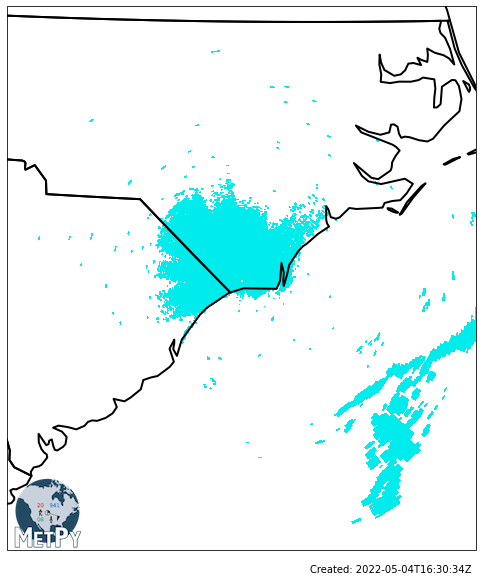

In [39]:
from metpy.plots import ctables, add_timestamp, add_metpy_logo

state_borders = cartopy.feature.NaturalEarthFeature( category='cultural', 
                                                    name='admin_1_states_provinces_lakes',
                                                   scale='50m', facecolor='none')

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1, projection=proj)

norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 16, 16)
mesh = ax.pcolormesh(x, y, radar_data, norm=norm, cmap=cmap, zorder=0)
add_timestamp(ax, time=data_time)
add_metpy_logo(fig, y=30)
ax.add_feature(state_borders, edgecolor='black', linewidth=2, zorder=2)

distance_in_degrees = 2.7
ax.set_extent([data.RadarLongitude - distance_in_degrees,
              data.RadarLongitude + distance_in_degrees,
              data.RadarLatitude - distance_in_degrees,
              data.RadarLatitude + distance_in_degrees ])